# Concrete Compressive Strength Regression Project
## 콘크리트 압축 강도 회귀 분석
https://www.kaggle.com/datasets/niteshyadav3103/concrete-compressive-strength

<br>

#### feature (6개)
- Cement: 시멘트 양 (kg/m^3)
- BlastFurnaceSlag: 고로 슬래그 양 (kg/m^3)
- FlyAsh: 플라이 애시(불연재) 양 (kg/m^3)
- Water: 물 양 (kg/m^3)
- Superplasticizer: 고성능 플라스틱화제 양 (kg/m^3)
- CoarseAggregate: 거친 골재 양 (kg/m^3)
- FineAggregate: 미분 골재 양 (kg/m^3)
- Age: 콘크리트의 나이 (일)


<br>

#### target
- Concretecompressivestrength: 콘크리트의 압축 강도 (MPa)

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [24]:
import pandas as pd

# 데이터 호출
c_df = pd.read_csv('./datasets/ConcreteCompressiveStrength.csv', low_memory=False)
c_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


#### 📊 데이터 탐색

In [25]:
# 데이터 정보 확인
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [26]:
# 데이터 크기 확인
c_df.shape

(1030, 9)

#### 📊 데이터 전처리

In [27]:
# 결측치 확인
c_df.isna().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

In [28]:
# null 값 확인
c_df.isnull().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

In [29]:
# 중복행 확인
c_df.duplicated().sum()

25

In [30]:
# 중복행 제거 
pre_c_df = c_df.drop_duplicates().reset_index(drop=True)
# 제거 확인
pre_c_df.duplicated().sum()

0

In [31]:
# 컬럼명 변경
pre_c_df.columns = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
                    'CoarseAggregate', 'FineAggregate', 'Age', 'Concretecompressivestrength']

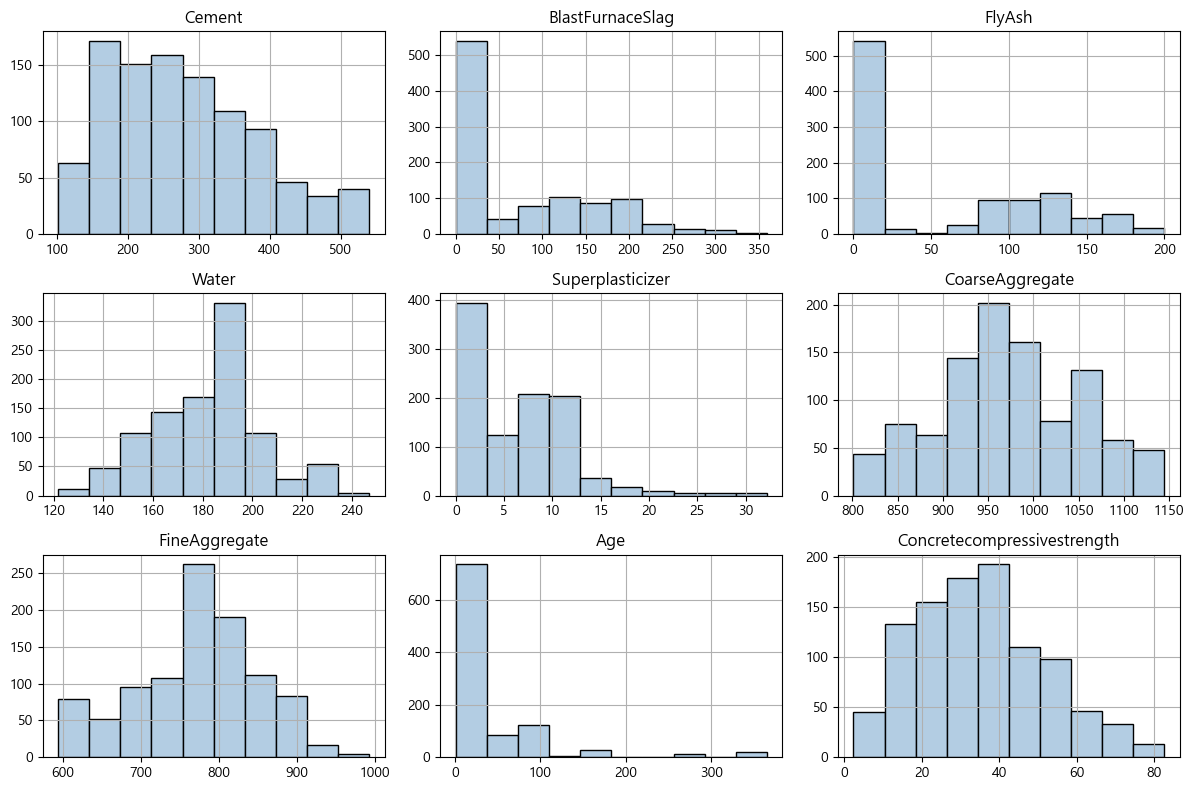

In [32]:
# 컬럼 분포 확인
pre_c_df.hist(figsize=(12, 8), color=cmap(np.array([1])), edgecolor='black')
plt.tight_layout()
plt.show()

In [33]:
# 타겟 데이터 이상치 제거
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
std = StandardScaler()
# 데이터 표준화 변환
result = std.fit_transform(pre_c_df[['Concretecompressivestrength']])
# 표준화 데이터 프레임 생성
std_c_df = pd.DataFrame(result, columns=['Concretecompressivestrength'])

# 타겟 데이터 이상치 제거
std_c_df = std_c_df[std_c_df.Concretecompressivestrength.between(-1.96, 1.96)]

# 이상치 제거후 유지되는 인덱스를 대조하여 원본 데이터 이상치 제거
pre_c_df = pre_c_df.iloc[std_c_df.index].reset_index(drop=True)
pre_c_df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Concretecompressivestrength
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
...,...,...,...,...,...,...,...,...,...
959,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
960,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
961,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
962,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


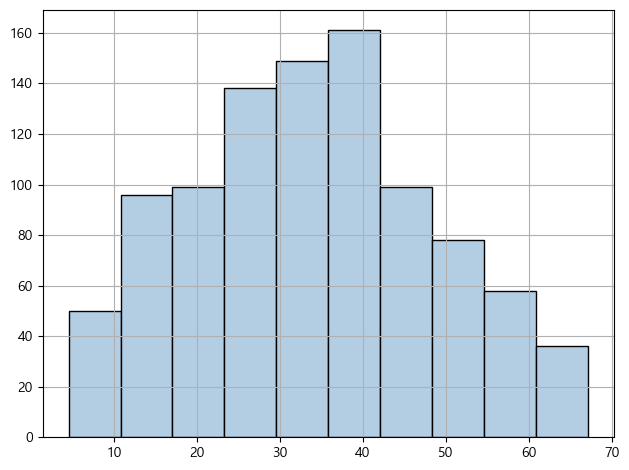

In [35]:
# 타겟 컬럼 분포 확인
pre_c_df.Concretecompressivestrength.hist(color=cmap(np.array([1])), edgecolor='black')
plt.tight_layout()
plt.show()

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(MSLE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
         .format(MSE, RMSE, MSLE, RMSLE, R2))

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련
l_r.fit(X_train, y_train)

LinearRegression()

In [39]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 95.7657, RMSE: 9.7860, MSLE: 0.1077, RMSLE: 0.3282, R2: 0.4975


In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 차수 확장
poly_features = PolynomialFeatures(degree=3).fit_transform(features)

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련
l_r.fit(X_train, y_train)

LinearRegression()

In [47]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 39.6896, RMSE: 6.3000, MSLE: 0.0451, RMSLE: 0.2123, R2: 0.7917


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀 모델 담기
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(random_state=124)
lgb_r = LGBMRegressor(random_state=124)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

# 모델 별 학습 진행:
for model in models:
    # 모델 학습
    model.fit(X_train, y_train)
    # 예측
    prediction = model.predict(X_test)
    # 모델명 출력 (모델명과 평가 결과가 같이 출력되도록)
    print(model.__class__.__name__)
    # 평가
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 37.8513, RMSE: 6.1523, MSLE: 0.0409, RMSLE: 0.2023, R2: 0.8014
RandomForestRegressor
MSE: 22.4852, RMSE: 4.7419, MSLE: 0.0319, RMSLE: 0.1787, R2: 0.8820
GradientBoostingRegressor
MSE: 25.9433, RMSE: 5.0935, MSLE: 0.0337, RMSLE: 0.1837, R2: 0.8639
XGBRegressor
MSE: 22.7336, RMSE: 4.7680, MSLE: 0.0295, RMSLE: 0.1717, R2: 0.8807
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 771, number of used features: 8
[LightGBM] [Info] Start training from score 34.036860
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light